In [3]:
!pip3 install xgboost

In [4]:
import pandas as  pd
import numpy as np
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
train =  pd.read_csv('Data/train_new.csv')
test = pd.read_csv('Data/test_new.csv')

test_og = pd.read_csv('Data/test.csv')

In [5]:
#Removing the Loan_ID since it has no effect.
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

X = train.drop('Loan_Status', 1)
y = train.Loan_Status

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

C:\Users\hp\AppData\Local\Temp\ipykernel_12184\1690414073.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop('Loan_Status', 1)


In [6]:
# LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(x_train, y_train)

#preddicting the Loan_status.

pred_cv = model.predict(x_cv)

#now let's calculate the accuracy of the model.

log_reg = accuracy_score(y_cv, pred_cv)

# let's make the predection for the test dataset
pred_test = model.predict(test)

print('The Accuracy of Logistic Regression Model:',log_reg*100)

The Accuracy of Logistic Regression Model: 78.91891891891892


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
submission = pd.read_csv('Data/submission.csv')

submission.Loan_Status = pred_test
submission.Loan_Status.replace(1, 'Y', inplace=True)
submission.Loan_Status.replace(0, 'N', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('submission.csv', index=False)

In [8]:
# Cross Validation metrics Using Stratified-K-Folds 
print('\n Logistic Regression using stratified k-folds')
i = 1

KF = StratifiedKFold(n_splits = 5, random_state=1,shuffle=True)

for train_index, test_index in KF.split(X,y):
    print('\n{} of Kfold {} '.format(i,KF.n_splits))
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xvalidation = X.iloc[test_index]
    yvalidation = y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtrain,ytrain)
    pred_test = model.predict(xvalidation)
    score = accuracy_score(yvalidation, pred_test)
    print('accuracy_score', score)
    i+=1 
    pred_test = model.predict(test)
    pred = model.predict_proba(xvalidation)[:,1]


 Logistic Regression using stratified k-folds

1 of Kfold 5 
accuracy_score 0.8048780487804879

2 of Kfold 5 


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

accuracy_score 0.8373983739837398

3 of Kfold 5 
accuracy_score 0.7804878048780488

4 of Kfold 5 
accuracy_score 0.7886178861788617

5 of Kfold 5 
accuracy_score 0.7950819672131147


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


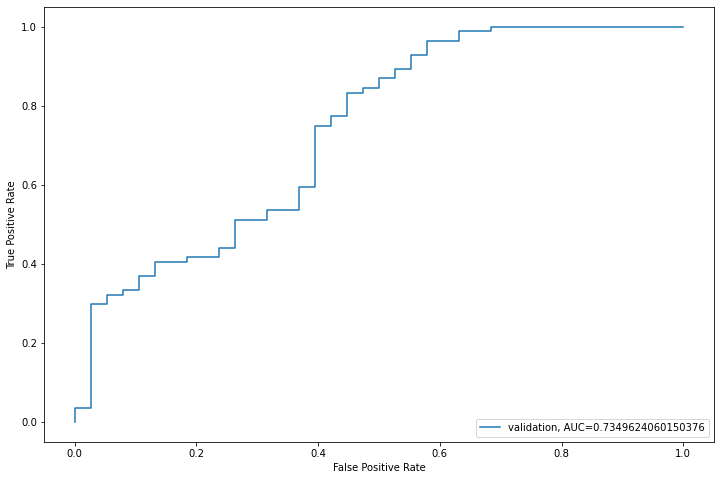

In [9]:
False_Positive_Rate, True_Positive_Rate, _ = metrics.roc_curve(yvalidation, pred, pos_label='Y')
AUC = metrics.roc_auc_score(yvalidation, pred)
plt.figure(figsize=(12,8))
plt.plot(False_Positive_Rate, True_Positive_Rate, label='validation, AUC='+str(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)#Location of the legend on the position on the screen represented by numbers from 1 to 4.
plt.show()

In [10]:
# Feature Engineering
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [11]:
train['Total_Amount'] = train.ApplicantIncome + train.CoapplicantIncome
test['Total_Amount'] = test.ApplicantIncome + test.CoapplicantIncome

In [12]:

train['Total_Amount_log'] = np.log(train.Total_Amount)
test['Total_Amount_log'] = np.log(test.Total_Amount)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Amount_log', ylabel='Density'>

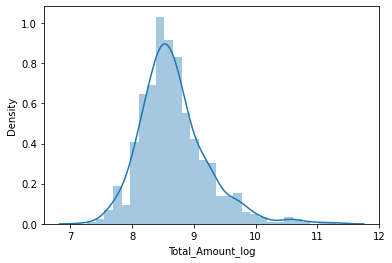

In [13]:
sns.distplot(train.Total_Amount_log)

In [14]:

train['EMI'] = train.LoanAmount / train.Loan_Amount_Term
test['EMI'] = test.LoanAmount / train.Loan_Amount_Term

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI', ylabel='Density'>

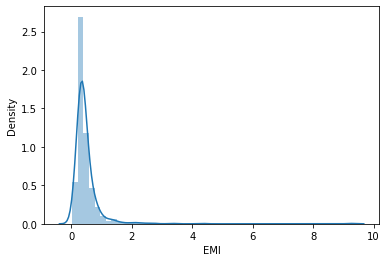

In [15]:
sns.distplot(train.EMI)

In [16]:
train['Balance_Income'] = train['Total_Amount'] -(train['EMI']*1000)
test['Balance_Income'] = test['Total_Amount'] -(test['EMI']*1000)

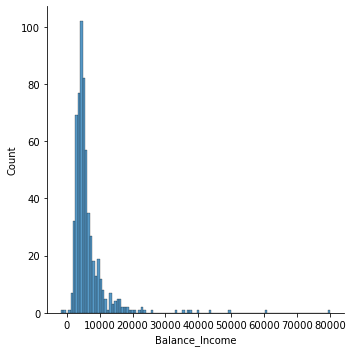

In [17]:
sns.displot(train.Balance_Income)

In [18]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1)

In [19]:
# Decision Tree.

In [20]:
i=1
KF = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in KF.split(X,y):
    print('\n{} of Kfolds {} '.format(i, KF.n_splits))
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xvalidation = X.iloc[test_index]
    yvalidation = y.iloc[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtrain,ytrain)
    pred_test = model.predict(xvalidation)
    score = accuracy_score(yvalidation, pred_test)
    print('Accuracy Score of Decision Tree is ',score)
    i+=1
    pred_test = model.predict(test)


1 of Kfolds 5 
Accuracy Score of Decision Tree is  0.7073170731707317

2 of Kfolds 5 
Accuracy Score of Decision Tree is  0.7235772357723578

3 of Kfolds 5 
Accuracy Score of Decision Tree is  0.7073170731707317

4 of Kfolds 5 
Accuracy Score of Decision Tree is  0.7154471544715447

5 of Kfolds 5 
Accuracy Score of Decision Tree is  0.6885245901639344


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Balance_Income
- EMI
- Total_Amount
- Total_Amount_log
Feature names seen at fit time, yet now missing:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

  warnings.warn(message, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Balance_Income
- EMI
- Total_Amount
- Total_Amount_log
Feature names seen at fit time, yet now missing:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

  warnings.warn(message, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that we

In [21]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_og['Loan_ID']

In [22]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [23]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Decision Tree.csv', index=False)

In [24]:
# Random Forest

In [25]:
i=1
KF = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in KF.split(X,y):
    print('\n{} of Kfolds {} '.format(i, KF.n_splits))
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xvalidation = X.iloc[test_index]
    yvalidation = y.iloc[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtrain,ytrain)
    pred_test = model.predict(xvalidation)
    score = accuracy_score(yvalidation, pred_test)
    print('Accuracy Score of Random Forest is ',score)
    i+=1
    pred_test = model.predict(test)


1 of Kfolds 5 
Accuracy Score of Random Forest is  0.8130081300813008

2 of Kfolds 5 


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Balance_Income
- EMI
- Total_Amount
- Total_Amount_log
Feature names seen at fit time, yet now missing:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

  warnings.warn(message, FutureWarning)


Accuracy Score of Random Forest is  0.8373983739837398

3 of Kfolds 5 


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Balance_Income
- EMI
- Total_Amount
- Total_Amount_log
Feature names seen at fit time, yet now missing:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

  warnings.warn(message, FutureWarning)


Accuracy Score of Random Forest is  0.7804878048780488

4 of Kfolds 5 


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Balance_Income
- EMI
- Total_Amount
- Total_Amount_log
Feature names seen at fit time, yet now missing:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

  warnings.warn(message, FutureWarning)


Accuracy Score of Random Forest is  0.8130081300813008

5 of Kfolds 5 


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Balance_Income
- EMI
- Total_Amount
- Total_Amount_log
Feature names seen at fit time, yet now missing:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

  warnings.warn(message, FutureWarning)


Accuracy Score of Random Forest is  0.7622950819672131


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Balance_Income
- EMI
- Total_Amount
- Total_Amount_log
Feature names seen at fit time, yet now missing:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

  warnings.warn(message, FutureWarning)


In [26]:
# GridSearch

In [27]:
param_grid = {'max_depth': list(range(1, 20, 2)),
             'n_estimators': list(range(1,200, 20))
             }


In [28]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid)

In [29]:
grid_search.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [30]:
GridSearchCV(cv=None, error_score='raise',
             estimator = RandomForestClassifier(bootstrap = True, class_weight = None, 
                                                criterion='gini', max_depth= None, 
                                                max_features='auto', max_leaf_nodes= None,
                                                min_impurity_decrease = 0.0, 
                                                min_impurity_split=None, min_samples_leaf = 1,
                                                min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                                                n_estimators= 10, n_jobs=1, oob_score=False, 
                                                random_state =1, verbose =0, warm_start=False),
             n_jobs=1,
             param_grid = {'max_depth': list(range(1, 20, 2)),
             'n_estimators': list(range(1,200, 20))
             }, pre_dispatch = '2*n_jobs', refit = True,
             scoring = None, verbose=0
             )


TypeError: __init__() got an unexpected keyword argument 'min_impurity_split'

In [ ]:
#Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap = True, class_weight = None, 
                                                criterion='gini', max_depth= None, 
                                                max_features='auto', max_leaf_nodes= None,
                                                min_impurity_decrease = 0.0, 
                                                min_impurity_split=None, min_samples_leaf = 1,
                                                min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                                                n_estimators= 10, n_jobs=1, oob_score=False, 
                                                random_state =1, verbose =0, warm_start=False)

In [ ]:
i=1
KF = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in KF.split(X,y):
    print('\n{} of Kfolds {} '.format(i, KF.n_splits))
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xvalidation = X.iloc[test_index]
    yvalidation = y.iloc[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtrain,ytrain)
    pred_test = model.predict(xvalidation)
    score = accuracy_score(yvalidation, pred_test)
    print('Accuracy Score of Random Forest is ',score)
    i+=1
    pred_test = model.predict(test)



In [ ]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_og['Loan_ID']


In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Random Forest.csv', index=False)

In [ ]:

importances = pd.Series(model.feature_importances_, index= X.columns)
importances.plot(kind='barh', figsize=(16,8))


In [ ]:
# XGBOOST

In [ ]:
i=1
KF = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in KF.split(X,y):
    print('\n{} of Kfolds {} '.format(i, KF.n_splits))
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    xvalidation = X.iloc[test_index]
    yvalidation = y.iloc[test_index]
    model = XGBClassifier(max_depth=4, n_estimators=50)
    model.fit(xtrain,ytrain)
    pred_test = model.predict(xvalidation)
    score = accuracy_score(yvalidation, pred_test)
    print('Accuracy Score of Random Forest is ',score)
    i+=1
    pred_test = model.predict(test)
    pred3 = model.predict_proba(test)[:,1]